<a href="https://colab.research.google.com/github/jwoo13/Computer1/blob/main/202120992%EB%B0%95%EC%A0%95%EC%9A%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
469/469 - 303s - 647ms/step - accuracy: 0.9424 - loss: 0.1879 - val_accuracy: 0.9111 - val_loss: 0.2817
Epoch 2/15
469/469 - 305s - 650ms/step - accuracy: 0.9796 - loss: 0.0644 - val_accuracy: 0.9893 - val_loss: 0.0311
Epoch 3/15
469/469 - 303s - 646ms/step - accuracy: 0.9845 - loss: 0.0499 - val_accuracy: 0.9911 - val_loss: 0.0255
Epoch 4/15
469/469 - 322s - 686ms/step - accuracy: 0.9870 - loss: 0.0412 - val_accuracy: 0.9913 - val_loss: 0.0248
Epoch 5/15
469/469 - 312s - 665ms/step - accuracy: 0.9887 - loss: 0.0346 - val_accuracy: 0.9930 - val_loss: 0.0216
Epoch 6/15
469/469 - 322s - 687ms/step - accuracy: 0.9898 - loss: 0.0317 - val_accuracy: 0.9928 - val_loss: 0.0212
Epoch 7/15
469/469 - 293s - 624ms/step - accuracy: 0.9911 - loss: 0.0271 - val_accuracy: 0.9928 - val_loss: 0.0199
Epoch 8/15
469/469 - 322s - 687ms/step - accuracy: 0.9917 - loss: 0.0259 - val_accuracy: 0.9922 - val_loss: 0.0237
Epoch 9/15
469/469 - 294s - 627ms/step - accuracy: 0.9920 - loss: 0.0239 - val_a

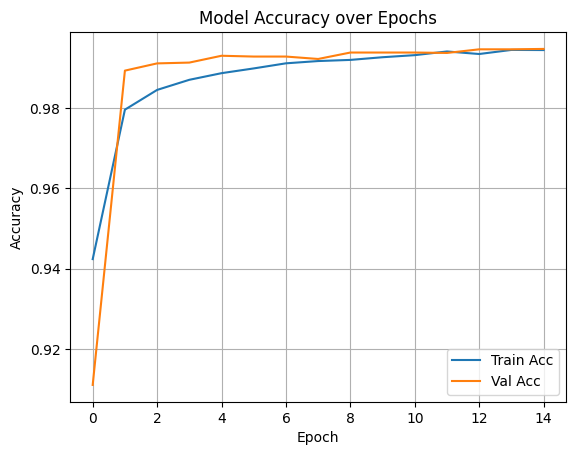

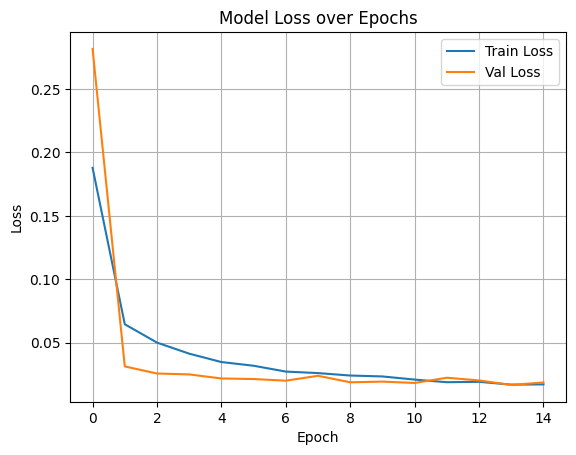

In [ ]:
# 1. 데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. CNN 입력 형태로 reshape + 정규화
x_train = x_train.reshape(-1, 28, 28, 1).astype(np.float32) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype(np.float32) / 255.0

# 3. One-hot 인코딩 (0~9 → 10개 클래스)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 4. CNN 모델 구성
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.35),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# 5. 컴파일 및 학습
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=15, validation_data=(x_test, y_test), verbose=2)

# 6. 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"테스트 정확도: {test_acc * 100:.2f}%")

# 7. 정확도 변화 시각화
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# 8. 손실 변화 시각화
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()